# <center>Application of Cluster Analysis - Customer Segmentation </center>

### Dataset: Mall Customers
#### Authors:
Anusha Gajinkar (D19008), Vighnesh Tamse (D19037)

### Problem Statement:
A shopping complex at a region wants to increase its revenue by attracting new customers. Here our main objective is to identify the purchasing behaviour of the customer.

### Technique used to solve this problem:
Based on the previous customers data, we can segregate different types of customers based on their purchasing behaviour using the **"K-Means Clustering"** machine learning technique.
K-Means Clustering is an unsupervised machine learning technique wherein we group similar elements or data points of a dataset into clusters.
The elements present in each cluster are homogeneous whereas the clusters are heterogeneous.
Using this technique we can group customers with similar purchasing behaviour into one cluster which will further allow the shopping complex to launch different campaigns based on these clusters for each customer type and hence increase their customer base which will in turn increase its revenue.

### Describing the data:
The dataset consists of 5 columns namely: CustomerID, Gender, Age, Annual Income(k$) and Spending Score(1-100).

1. **CustomerID** : Represents the ID of each customer (probably the transaction ID).

2. **Gender** : Represents the gender of the customer.

3. **Age** : Represents the age of the customer in years.

4. **Annual Income(k$)** : Represents the annual income of the customer in 1000 dollars.

5. **Spending Score** : Represents the score(out of 100) given to a customer by the shopping complex authorities, depending on the spending behavior of the customers.

### What is Clustering?
Clustering, an unsupervised learning algorithm, is one of the most frequently used machine learning techniques. It is used to create homogenous groups of customers or data points to study their behavior which further helps in better decision making. In clustering, the objective is to ensure that the variation within a cluster a minimized while the variation between clusters is maximized.

### Types of Clustering:
1. **Agglomerative Hierarchial Clustering:** Also known as bottom-up approach or hierarchical agglomerative clustering (HAC).The number of cluster are not decided a priori. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

2. **Divisive Hierarchial Clustering:** Also known as top-down approach. The number of cluster are not decided a priori. Top-down clustering requires a method for splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been splitted into singleton cluster.

3. **K-Means Clustering:** It is one of the most frequently used clustering algorithms. It is a non-hierarchial clustering method in which number of clusters are decided a piori. The observations in the data are assigned to one of the clusters based on the distance between the observation and the centroid of the clusters.

### K-Means Clustering Algorithm
The following steps are used in K-Means Clustering algorithm:
1. Decide the value of K i.e. the number of cluster by using Elbow curve method or any other suitable method.
2. Choose K observations from the data that are likely to be in different clusters. There are many ways of choosing these initial K values; the easiest approach is to choose observations that are farthest(in one of the parameters of the data).
3. The K observations selected in step 2 are the centroids of those clusters.
4. For remaining observations, find the cluster closest to the centroid. Add the new observation(say observation j) to the cluster with closest centroid. Adjust the centroid after adding a new observation to the cluster. The closest centroid is chosen based upon an appropriate distance measure.
5. Repeat step 4 until all the observations are assigned to a cluster.

### K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
mall=pd.read_csv("Mall_Customers.csv")

In [3]:
m=mall.copy()
m[0:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
m['Gender'].replace(['Female','Male'],[1,0],inplace=True)
m[0:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Normalizing Features
The clusters will be strongly influenced by the magnitudes of the variables, especially by outliers. Normalizing removes this bias and ensures that good quality clusters are generated which can improve the efficiency of clustering alogorithm.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #Standardize features by removing the mean and scaling to unit variance
scaled_m=scaler.fit_transform(m[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]])

### Finding Optimal Number of Clusters Using Elbow Curve Method
If we assume only one customer segment, then the varaince of the cluster will be highest. As we increase the number of clusters, the total varaince of all clusters will start reducing. So, Elbow curve method considers the percentage of varaince explained as a function of the number of clusters. The optimal number of clusters is chosen in such a way that adding another doesnot change the variance explained significantly.

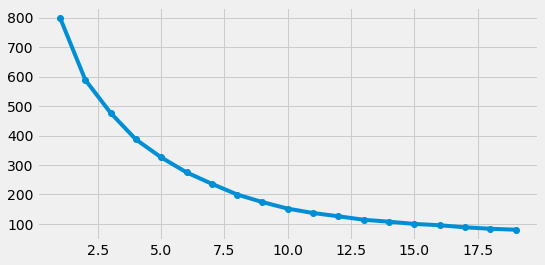

In [32]:
from sklearn.cluster import KMeans
# this code iterates and creates clusters ranging from 1 to 20 and captures the total varaimce in the variable cluster_errors
cluster_range=range(1,20)  
wcss = []
for i in cluster_range:
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(scaled_m)
    wcss.append(km.inertia_) #interia_parameter in KMeans cluster algorithms provides the total variance for perticular number of clusters.
plt.figure(figsize=(8,4))
plt.plot(cluster_range,cluster_errors,marker="o")
plt.show()

The plot indicates that the elbow point is at 5, which indicates there might be five clusters in our dataset. Here we are creating 5 clusters but we can also create 7 clusters but there is no much variation.

In [20]:
km = KMeans(n_clusters=5,n_init=40)
#Fit the kmeans model
km.fit(scaled_m)
#Within Group SSE
km.inertia_

325.10998348953444

In [21]:
scaled_m = pd.DataFrame(scaled_m)
scaled_m.head()

,0,1,2,3
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [58]:
scaled_m.columns = m.columns[1:]

In [59]:
scaled_m.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


### Creating clusters using KMeans clustering

In [18]:
k=5
clusters=KMeans(k)
clusters.fit(scaled_m)
m["clusterid"]=clusters.labels_
m[0:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterid
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,2
3,4,1,23,16,77,1
4,5,1,31,17,40,2


### Plotting Customers with thier segments

C:\Users\Vighnesh Tamse\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


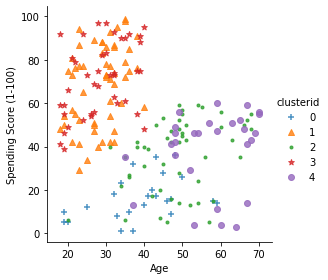

In [19]:
markers=['+','^',".","*","o"]
sn.lmplot("Age","Spending Score (1-100)",data=m,hue="clusterid",fit_reg=False,markers=markers,size=4)

C:\Users\anusha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


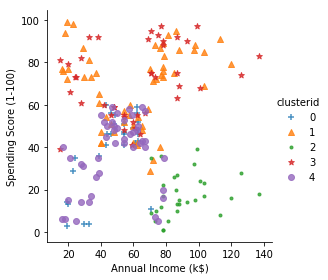

In [20]:
markers=['+','^',".","*","o"]
sn.lmplot("Annual Income (k$)","Spending Score (1-100)",data=m,hue="clusterid",fit_reg=False,markers=markers,size=4)

C:\Users\anusha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


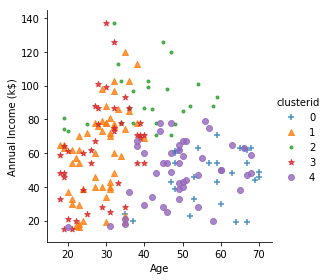

In [23]:
markers=['+','^',".","*","o"]
sn.lmplot("Age","Annual Income (k$)",data=m,hue="clusterid",fit_reg=False,markers=markers,size=4)
plt.show()

### Interpreting the clusters

In [15]:
summary=pd.DataFrame()
k5c1=m[m.clusterid==0]
k5c2=m[m.clusterid==1]
k5c3=m[m.clusterid==2]
k5c4=m[m.clusterid==3]
k5c5=m[m.clusterid==4]
summary["k5c1_count"]=k5c1.count()
summary["k5c2_count"]=k5c2.count()
summary["k5c3_count"]=k5c3.count()
summary["k5c4_count"]=k5c4.count()
summary["k5c5_count"]=k5c5.count()

summary["k5c1_avg"]=k5c1.mean()
summary["k5c2_avg"]=k5c2.mean()
summary["k5c3_avg"]=k5c3.mean()
summary["k5c4_avg"]=k5c4.mean()
summary["k5c5_avg"]=k5c5.mean()

summary["k5c1_median"]=k5c1.median()
summary["k5c2_median"]=k5c2.median()
summary["k5c3_median"]=k5c3.median()
summary["k5c4_median"]=k5c4.median()
summary["k5c5_median"]=k5c5.median()

summary

,k5c1_count,k5c2_count,k5c3_count,k5c4_count,k5c5_count,k5c1_avg,k5c2_avg,k5c3_avg,k5c4_avg,k5c5_avg,k5c1_median,k5c2_median,k5c3_median,k5c4_median,k5c5_median
CustomerID,28,56,29,41,46,67.821429,101.910714,168.241379,102.756098,73.956522,68.0,109.0,171.0,104.0,72.5
Gender,28,56,29,41,46,0.000000,1.000000,0.344828,0.000000,1.000000,0.0,1.0,0.0,0.0,1.0
Age,28,56,29,41,46,57.214286,28.392857,39.724138,28.536585,49.043478,59.0,29.5,41.0,28.0,49.0
Annual Income (k$),28,56,29,41,46,46.785714,60.428571,90.827586,61.804878,48.913043,48.5,62.5,87.0,62.0,49.5
Spending Score (1-100),28,56,29,41,46,38.714286,68.178571,17.620690,71.097561,37.217391,46.0,73.0,16.0,73.0,42.0
clusterid,28,56,29,41,46,0.000000,1.000000,2.000000,3.000000,4.000000,0.0,1.0,2.0,3.0,4.0


1. First and third cluster have less no.of customers compared other clusters.

2. **First Cluster:** The first cluster has females with an average age near 30, with average salary around 60(k$) and spending score around 70. This cluster has young female adult customers with average salary and high spending score.

3. **Second Cluster:** The second cluster has males with an average age near 60, with average salary around 50(k$) and spending score around 40. This cluster has middle aged males adult customers with less than average salary and less than average spending score.

4. **Third Cluster:** The third cluster has males with an average age near 30, with average salary around 60(k$) and spending score around 70. This cluster has young male adult customers with average salary and high spending score.

5. **Fourth Cluster:** The fourth cluster has males with an average age near 50, with average salary around 60(k$) and spending score around 35. This cluster has middle aged females adult customers with average salary and less than average spending score.

6. **Fifth Cluster:** The fifth cluster has males with an average age near 40, with average salary around 80(k$) and spending score around 14. This cluster has middle aged male adult customers with high salary but very less spending score.


### Suggestions to solve problem

From above customer segments we can see that the young adults with average salary are the one who spend more in the malls or shopping complexes so we need attract more youths, both males and females. For these type of customers, we need to analyse which service is most used by them like if most of them visit the mall for dining, socilaizing or for entertainment then the authorities need to launch campaigns o events that can attract more youth. Sending messages to them about events, offers and giving free wifi connectivity can help reach out to them easily. If more visits and more time is spent then we can expect more spending and hence more revenue.

Other two segments have middle aged adults both spending less. One way to attract them will be to keep activities for kids like variety of games, some of which could be related to physical activities, competitions, bookstores with all kinds of books, arts and crafts etc.

Also, there is one segement of middle aged males with high salary but they spend the least. These customer are to be studied seperately to identify their needs and what are the things that could bring them to malls since they have potential to spend money. The recommendations given in second point can be applicable for these customers as well.

These recommendations depends on the area where the shopping complex is located.
